In [1]:
import pandas as pd
import requests
import re
import time

In [2]:
headers = {
    'Referer': 'https://www.rottentomatoes.com/m/notebook/reviews?type=user',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.108 Safari/537.36',
    'X-Requested-With': 'XMLHttpRequest',
}

In [3]:
s = requests.Session()

In [4]:
def get_critic_reviews(url):
    r = requests.get(url)
    movie_id = re.findall(r'(?<=movieId":")(.*)(?=","type)',r.text)[0]

    api_url = f"https://www.rottentomatoes.com/napi/movie/{movie_id}/criticsReviews/all" #use reviews/userfor user reviews
    
    payload = {
        'direction': 'next',
        'endCursor': '',
        'startCursor': '',
    }
    
    review_data = []
    
    while True:
        r = s.get(api_url, headers=headers, params=payload)
        data = r.json()

        if not data['pageInfo']['hasNextPage']:
            break

        payload['endCursor'] = data['pageInfo']['endCursor']
        payload['startCursor'] = data['pageInfo']['startCursor'] if data['pageInfo'].get('startCursor') else ''

        review_data.extend(data['reviews'])
        time.sleep(1)
    
    return review_data

In [5]:
def get_user_reviews(url):
    r = requests.get(url)
    movie_id = re.findall(r'(?<=movieId":")(.*)(?=","type)',r.text)[0]

    api_url = f"https://www.rottentomatoes.com/napi/movie/{movie_id}/reviews/user" #use reviews/userfor user reviews
    
    payload = {
        'direction': 'next',
        'endCursor': '',
        'startCursor': '',
    }
    
    review_data = []
    
    while True:
        r = s.get(api_url, headers=headers, params=payload)
        data = r.json()

        if not data['pageInfo']['hasNextPage']:
            break

        payload['endCursor'] = data['pageInfo']['endCursor']
        payload['startCursor'] = data['pageInfo']['startCursor'] if data['pageInfo'].get('startCursor') else ''

        review_data.extend(data['reviews'])
        time.sleep(0.1)
    
    return review_data

In [6]:
data_c = get_critic_reviews('https://www.rottentomatoes.com/m/eternals/reviews')
df_critics = pd.json_normalize(data_c)

In [7]:
#data_u = get_user_reviews('https://www.rottentomatoes.com/m/eternals/reviews')
#df_users = pd.json_normalize(data_u)
df_users = pd.json_normalize(data_c)

In [13]:
df_critics.head(3)

,creationDate,isFresh,isRotten,isRtUrl,isTop,reviewUrl,quote,reviewId,scoreOri,scoreSentiment,critic.name,critic.criticPictureUrl,critic.vanity,publication.id,publication.name
0,"Dec 17, 2021",False,True,False,False,https://www.stabroeknews.com/2021/11/07/sunday...,"In snatches, it gives us a genuine moment of v...",2847486,,NEGATIVE,Andrew Kendall,http://resizing.flixster.com/AjKp_7xjdMNRnBOHI...,andrew-kendall,3473,Stabroek News
1,"Dec 17, 2021",True,False,False,True,https://www.buzzfeednews.com/article/michaelbl...,"Eternals is far from perfect, but it pushes th...",2847211,,POSITIVE,Michael Blackmon,https://images.fandango.com/cms/assets/5b6ff50...,michael-blackmon,2585,BuzzFeed News
2,"Dec 13, 2021",False,True,False,False,https://reelfilm.com/eternals/,...a completely misguided and misbegotten piec...,2846193,.5/4,NEGATIVE,David Nusair,http://resizing.flixster.com/v_xIIhBnI9gSTdDly...,david-nusair,1140,Reel Film Reviews


In [317]:
#df_users.tail(3)

In [318]:
df_users.head(3)

,rating,review,displayName,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,score,timeFromCreation,user.displayName,user.accountLink,user.realm,user.userId,displayImageUrl
0,2.0,Not great. Dull and lifeless. Too many charact...,Nis G,False,False,False,False,2.0,47m ago,Nis G,/user/id/979396393,RT,979396393,NaN
1,5.0,This movie felt like a breath of fresh air in ...,Teresa,True,False,False,False,5.0,1h ago,Teresa,NaN,Fandango,D2732AB1-09BE-41B5-A884-8B3D40AF8D5A,NaN
2,1.0,one of the worst marvel movies,iago w,False,False,False,False,1.0,2h ago,iago w,/user/id/979396108,RT,979396108,NaN


In [319]:
critics_review_text = ' '.join(df_critics['quote'])

In [320]:
user_review_text = ' '.join(df_users['review'])

In [133]:
#critics_review_text

In [322]:
#user_review_text

In [323]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

tokens_critics = []
tokens_critics = word_tokenize(critics_review_text)

In [325]:
print('Number of Critics Tokens =',len(tokens_critics))

Number of Critics Tokens = 10248


In [ ]:
tokens_users = []
tokens_users = word_tokenize(user_review_text)

In [328]:
print('Number of Users Tokens =',len(tokens_users))

Number of Users Tokens = 803545


In [336]:
#converts to lower case, and removes punctuation and numbers
wordsFiltered_critics = [tokens.lower() for tokens in tokens_critics if tokens.isalpha()]

In [337]:
print(len(wordsFiltered_critics))

8714


In [338]:
#print(wordsFiltered)

In [339]:
#User Reviews: converts to lower case, and removes punctuation and numbers
wordsFiltered_users = [tokens.lower() for tokens in tokens_users if tokens.isalpha()]

In [340]:
print(len(wordsFiltered_users))

695418


In [341]:
# Initialize the stopwords variable which is a list of words like 
#"The", "I", "and", etc. that don't hold much value as keywords
stop_words = stopwords.words('english')

In [343]:
# Additional stop words are needed after examining the WordClouds
extra_stop_words = ['eternals','movie','verifed', 'tv','rotten', 'tomatoes', 
                    'season', 'verified','review','view', 'rt','marvel', 'contain','certified',
                    'password','newsletter', 'critic','next','prev','email','film','take','mcu',
                    'one','feel','full','thing','comic','universe','think']
# Add the additional stop words 
stop_words.extend(extra_stop_words)

In [344]:
# Remove stop words from critic reviews tokenised data sets
filtered_words_critics = [word for word in wordsFiltered_critics if word not in stop_words]

In [358]:
# Display filtered number of remaining Critic Review Tokens
print(len(filtered_words_critics))

4075


In [ ]:
# remove stop words from user reviews tokenised data sets
filtered_words_users = [word for word in wordsFiltered_users if word not in stop_words]

In [360]:
# Display filtered number of remaining Critic Review Tokens
print(len(filtered_words_users))

326055


## Create the Word Cloud

Finally we can create a word cloud backed on the finalised data set of tokenised words. Here we use the WordCloud library to create the word cloud and then the matplotlib library to display the image.

In [361]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [362]:
mask_upcloud = np.array(Image.open("up_cloud.png"))
mask_downcloud = np.array(Image.open("down_cloud.png"))

In [363]:
wc_critics = WordCloud(max_words=200,   # Max words to include in WordCloud
               margin=10, 
               background_color='white',
               scale=3,                 # Scaling between computation and drawing
               collocations=True,       # Include collocations (bigrams) of two words. 
               normalize_plurals=True,  # Remove trailing ‘s’ from words.
               min_word_length=4,       # Minimum number of letters a word must have to include - ignore 2 or 3 letter words.
               relative_scaling = 0.5,
               mask=mask_upcloud,       # Change shape of wordcloud into UP cloud shape
               collocation_threshold=3, # Bigrams must have a Dunning likelihood collocation score greater than this 
                                        # parameter to be counted as bigrams.
               width=700, height=400,
               random_state=1).generate(' '.join(filtered_words_critics))  # WordCloud for Critics Reviews

In [364]:
wc_users = WordCloud(max_words=200,     # Max words to include in WordCloud
               margin=10, 
               background_color='white',
               scale=3,                 # Scaling between computation and drawing
               collocations=True,       # Include collocations (bigrams) of two words. 
               normalize_plurals=True,  # Remove trailing ‘s’ from words. 
               min_word_length=4,       # Minimum number of letters a word must have to include - ignore 2 or 3 letter words.
               relative_scaling = 0.5,
               mask=mask_downcloud,     # Change shape of wordcloud into DOWN cloud shape
               collocation_threshold=3, # Bigrams must have a Dunning likelihood collocation score greater than this 
                                        # parameter to be counted as bigrams. 
                     
               color_func=lambda *args, **kwargs: (255,0,0), # Red Colour for User Reviews
               
               width=700, height=400,
               random_state=1).generate(' '.join(filtered_words_users))  # WordCloud for User Reviews

In [365]:
#plt.figure(figsize=(20,10))
#plt.imshow(wc)

image_colors = ImageColorGenerator(mask_upcloud)
wc_critics.recolor(color_func=image_colors)

#plt.imshow(wc_critics, interpolation='bilinear')
#plt.axis("off")
#plt.show()
#wc.to_file("/wordcloud.png")

In [366]:
#plt.figure(figsize=(20,10))
#plt.imshow(wc_users, interpolation='bilinear')
#plt.tight_layout(pad=0)
#plt.axis("off")
#plt.show()

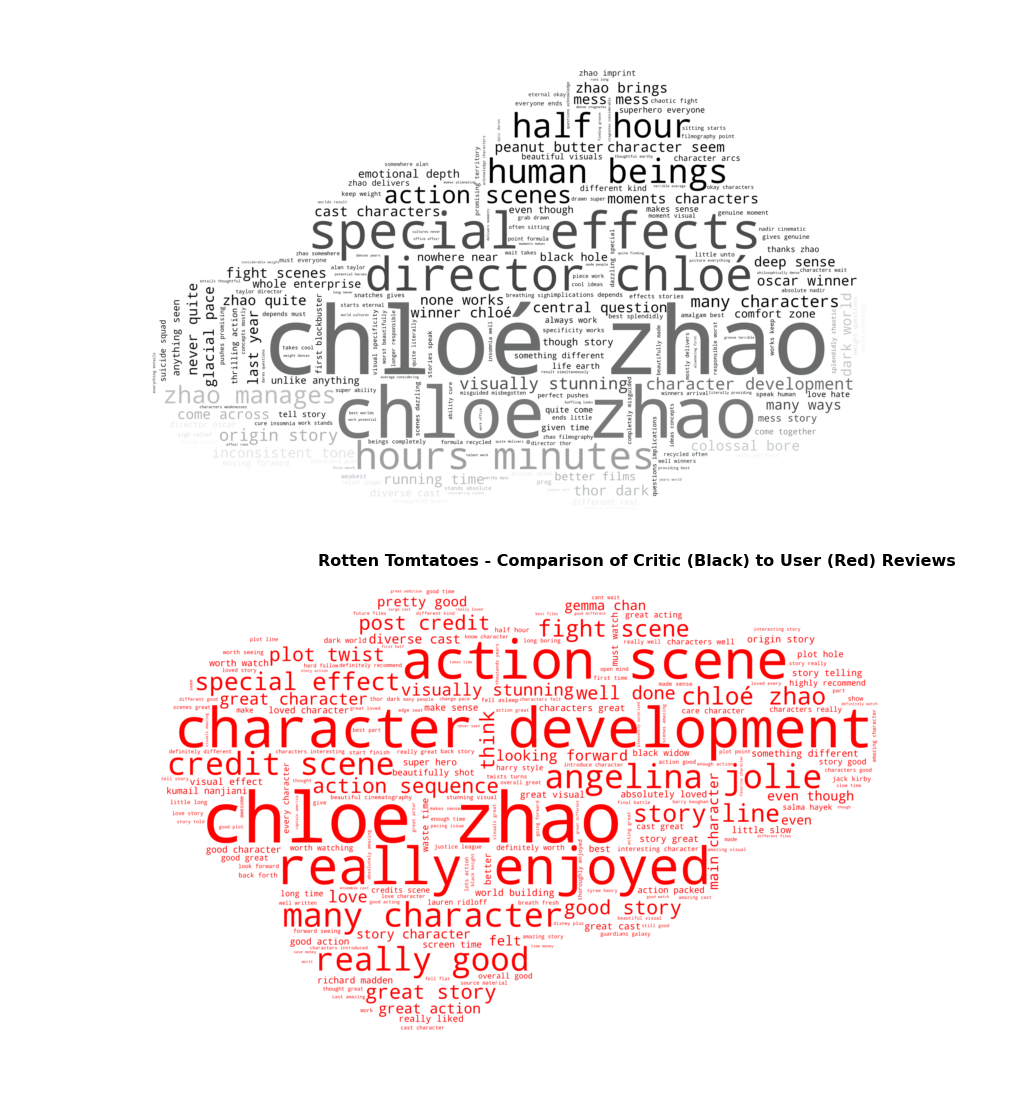

In [367]:
plt.figure(figsize=(45,20))

plt.subplot(211)
plt.imshow(wc_critics, interpolation='bilinear')
plt.axis("off")

plt.subplot(212)
plt.imshow(wc_users, interpolation='bilinear')
plt.axis("off")

plt.subplots_adjust(hspace=-0.13)
plt.suptitle('Rotten Tomtatoes - Comparison of Critic (Black) to User (Red) Reviews',fontweight ="bold", size=16, x=0.55, y=0.5)
plt.show()

## Word Cloud based on frequency counts

Another alternative when using the WordCloud library is to generate a WordCloud based on the frequency counts. For this you need to build up a table containing two items. The first item is the distinct token and the second column contains the number of times that word/token appears in the text. The following code shows this code and the code to generate the word cloud based on this frequency count.

In [368]:
from collections import Counter

In [369]:
# count frequencies
cnt = Counter()
for word in filtered_words_critics:
    cnt[word] += 1

In [370]:
#print(cnt)

In [371]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [372]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, 
               relative_scaling = 0.5, 
               collocation_threshold=100,
               width=500, height=400,
               random_state=1).generate_from_frequencies(cnt)

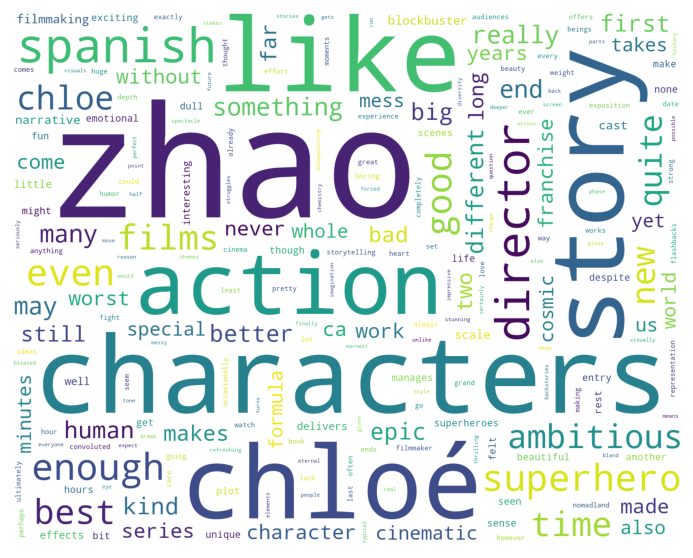

In [373]:
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()